# AI-generated exploratory notebook for Dandiset 000945

*This notebook was automatically generated using **dandi-notebook-gen** and has **not been fully verified**. Please exercise caution when interpreting code or results.*

---

# Overview

This notebook provides an example workflow to load and explore data from Dandiset **000945**, titled:

**"Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation"**

Researchers tested different ultrasound stimulation protocols on awake rats with chronic 32-channel implants. Recordings include spike times, trial epochs, electrode metadata, and cell type labels.

## Dandiset metadata summary
- **Subjects:** 10 male rats
- **Techniques:** chronic multi-shank electrode recording, focused ultrasound stimulation, spike sorting
- **Sessions:** various PRFs and anesthesia conditions
- **Units (neurons):** labeled by cell type
- **Trials:** ~500 per experiment, each with onset/offset timing
- **License:** CC-BY-4.0
- **Citation:** [Ramachandran et al., 2025, DANDI Archive](https://dandiarchive.org/dandiset/000945/draft)

## Package requirements
This notebook requires:
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`
- `dandi`

Please ensure these are installed in your environment.

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())
print(f"Total assets found: {len(assets)}")

# List first few NWB assets
for asset in assets[:5]:
    print(asset.path)

Total assets found: 75
sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Loading an example NWB file from the Dandiset

Here, we demonstrate remote loading of a specific NWB file to explore its content.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

nwb_url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"

file = remfile.File(nwb_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Subject ID:", nwb.subject.subject_id, "; Age:", nwb.subject.age, "; Sex:", nwb.subject.sex)
print("Institution:", nwb.institution)

Session description: Awake S1 Stimulation by tFUS
Subject ID: BH497 ; Age: P24W ; Sex: M
Institution: Carnegie Mellon University


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Basic dataset overview

In [3]:
print("Number of trials:", len(nwb.trials.id))
print("Number of electrodes:", len(nwb.electrodes.id))
print("Number of units (neurons):", len(nwb.units.id))
print("Unit columns:", nwb.units.colnames)

# Cell type labels
if 'celltype_label' in nwb.units.colnames:
    labels = nwb.units['celltype_label'][:]
    unique, counts = np.unique(labels, return_counts=True)
    print("Cell type distribution:")
    for u, c in zip(unique, counts):
        print(f"  {u}: {c}")
else:
    print("No celltype label available")

Number of trials: 500
Number of electrodes: 32
Number of units (neurons): 64
Unit columns: ('spike_times', 'celltype_label')
Cell type distribution:
  1.0: 32
  2.0: 32


## Distribution of spike counts across neurons

This histogram shows how many spikes were detected per neuron/unit.

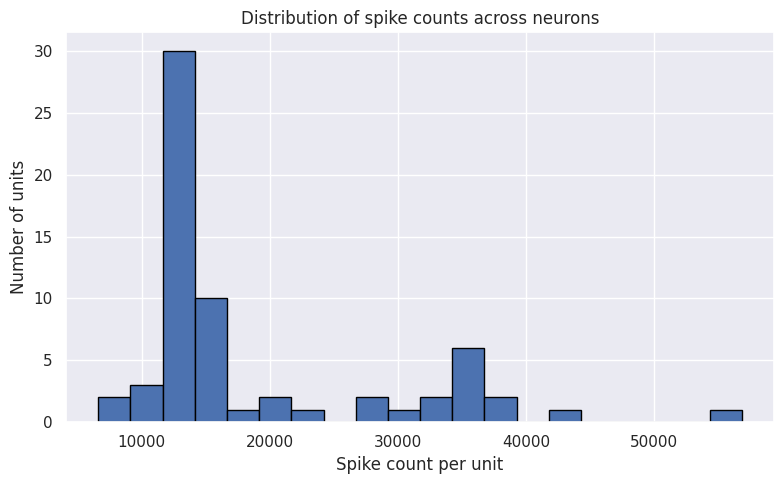

In [4]:
unit_ids = nwb.units.id[:]
counts = []
for idx in range(len(unit_ids)):
    spikes = nwb.units['spike_times'][idx]
    counts.append(len(spikes))

plt.figure(figsize=(8,5))
plt.hist(counts, bins=20, edgecolor='black')
plt.xlabel('Spike count per unit')
plt.ylabel('Number of units')
plt.title('Distribution of spike counts across neurons')
plt.tight_layout()
plt.show()

## Spike raster plot for example units

Here we plot spike times for 10 randomly selected units during the first 5 seconds, illustrating temporal activity structure and variability.

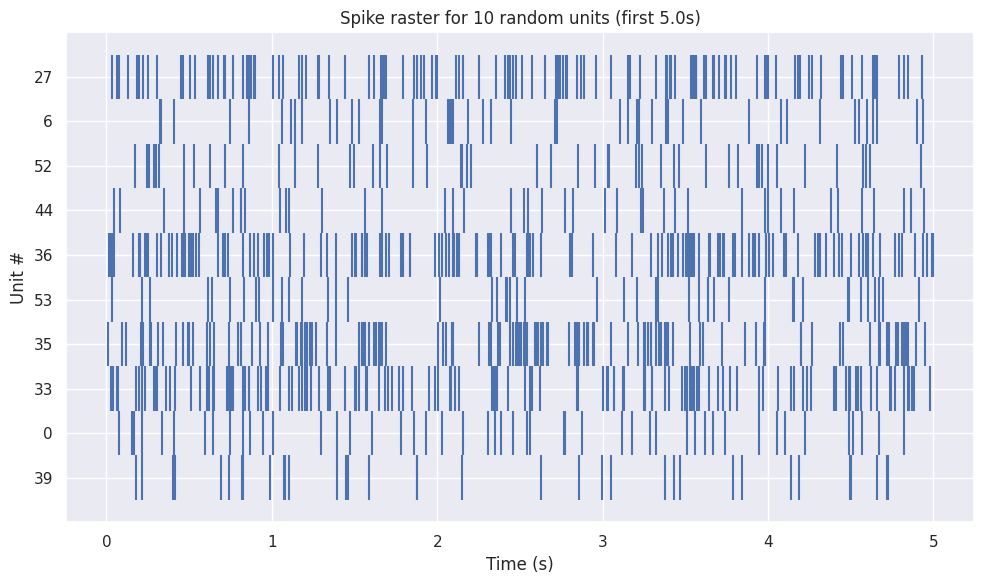

In [5]:
import random

n_units = len(unit_ids)
subset_size = min(10, n_units)
subset_indices = random.sample(range(n_units), subset_size)

plt.figure(figsize=(10,6))

time_window = 5.0  # seconds

for j, idx in enumerate(subset_indices):
    spikes = nwb.units['spike_times'][idx]
    spikes_in_window = spikes[spikes < time_window]
    plt.vlines(spikes_in_window, j + 0.5, j + 1.5)

plt.xlabel('Time (s)')
plt.ylabel('Unit #')
plt.yticks(np.arange(1, subset_size + 1), labels=[str(unit_ids[idx]) for idx in subset_indices])
plt.title(f'Spike raster for {subset_size} random units (first {time_window}s)')
plt.tight_layout()
plt.show()

## Electrode spatial configuration

The plot below visualizes the 3D spatial arrangement of electrodes across shanks.

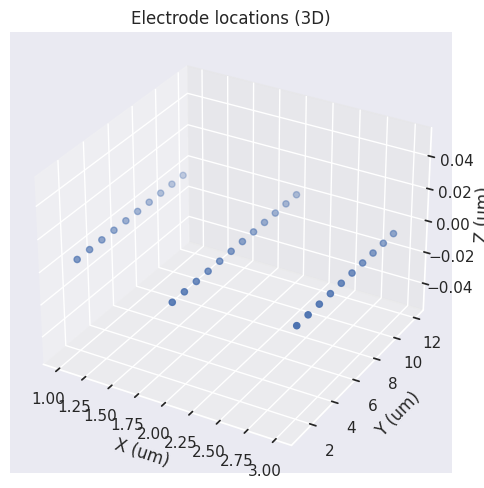

In [6]:
x = nwb.electrodes['x'][:]
y = nwb.electrodes['y'][:]
z = nwb.electrodes['z'][:]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X (um)')
ax.set_ylabel('Y (um)')
ax.set_zlabel('Z (um)')
ax.set_title('Electrode locations (3D)')
plt.tight_layout()
plt.show()

## Closing file

Always close the remote NWB file handle after use to free resources.

This concludes the exploratory notebook. To analyze other datasets or run more advanced analyses (e.g., spike sorting QC, stimulus-response alignment), additional custom analysis code will be needed.

In [7]:
io.close()